# Random Forest Classifier
Random Forests is a supervised learning algorithm. It can be used for both for classification and regression. It's super flexible and easy to use. A **forest** is comprised of trees - the more trees it has, the more robust a forest is. Random forests create decision trees on randomly selected data samples, get predictions from each tree and selects the best solution by means of voting. It's also a pretty good indicator of **feature importance**

Random forests have a variety of applications including:
* Recommendation engines
* Image classification
* Feature selection

It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

### A comparative example
Say you're going on a trip and would like to travel to a place you would enjoy. How do you find a place you will like?

You can ask your friends and talk with them about their past experiences, getting recommendations from every friend and making a list of those recommended places. Then, you ask them to vote (or select one best place for the trip) from the list of recommended places you made. The place with the highest number of votes will be your final choice for the trip.

The above process has two parts:
1. Asking your friends about their individual travel experience and getting one recommendation from each. This part is like using the decision tree algorithm.
2. After collecting all the recommendations is the voting procedure.

## How it works
**Steps**
1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result
4. Select the prediction result with the most votes as the final prediction.
![decision tree](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)

###### Pros
* Training and prediction are very fast due to the simplicity of the underlying decision trees; independent trees lends itself to parallelization
* Multiple trees allow for probablistic classification: a majority vote among estimators gives an estimate of the probability
* It does not often suffer from overfitting due to its process of average all predictions, canceling out the biases
* It can provide relative feature importance, which helps in selecting the most contributing features for the classifier

###### Cons
* The model is difficult to interpret compared to a decision tree where you can easily make a decision by following the path in the tree

## Feature Importance
Scikit's implementation of Random forests provides an extra variable with the model that shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance of each feature in the training phase then scales the relevance down so that the sum of all scores is 1.

Random forests use gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity - this is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection.

## Implementing a Classifier using Scikit-learn
We'll be building a model on the iris flower dataset to classify species: setosa, versicolor, and virginica.

#### Import and poke around the data

In [4]:
# import data
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
# print species
print(iris.target_names)

# print feature names
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Pushing the data into a DataFrame
import pandas as pd
data = pd.DataFrame({
    'sepal length': iris.data[:, 0],
    'sepal width':  iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width':  iris.data[:, 3],
    'species':      iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Split the data into train/test data

In [8]:
# split into train and test groups
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']] # Features
y = data['species'] # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Initialize and train the model

In [9]:
# import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#### Check the accuracy

In [10]:
from sklearn import metrics

# Model Accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9555555555555556


## Finding Important Features
**Steps**
1. Create a random forests model (already done above)
2. Use the feature importance variable to see feature importance scores
3. Viz the scores

In [11]:
# Get the feature importance scores from our model

feature_imp = pd.Series(clf.feature_importances_,
                        index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.509292
petal width (cm)     0.360539
sepal length (cm)    0.094172
sepal width (cm)     0.035997
dtype: float64

Text(0.5,1,'Visualizing Important Features')

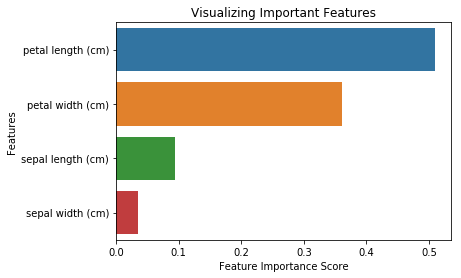

In [12]:
# plot the important features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

## Generating the Model on Selected Features
First thing we'll do is remove the "sepal width" feature because it has very low importance and use only the other 3.

In [13]:
# break the data into t/t split
X = data[['sepal length', 'petal length', 'petal width']] # removed sepal width
y = data['species'] # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###### Retrain the model

In [14]:
# Create classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9555555555555556


**1.0!** Pretty good. Well it was when I first ran this :(

## Random Forest Regression

Consider the following oscillation data:

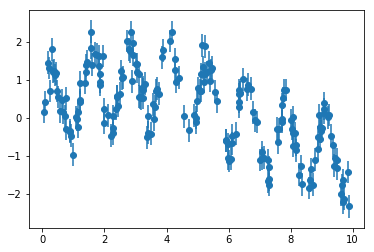

In [15]:
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

We can fit a curve using a random forest regressor:

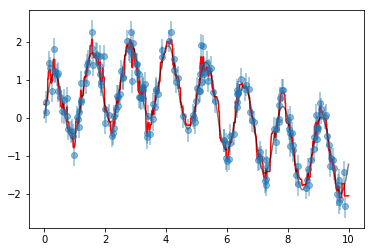

In [16]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200) # 200 = num trees
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

Here the true model is shown in the smooth gray curve, while the random forest model is shown by the jagged red curve. The non-parmetric random forest model is flexible enough to fit the multi-period data without us even specifying a multi-period model!

### Predicting Digits

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Let's visualize a few points:

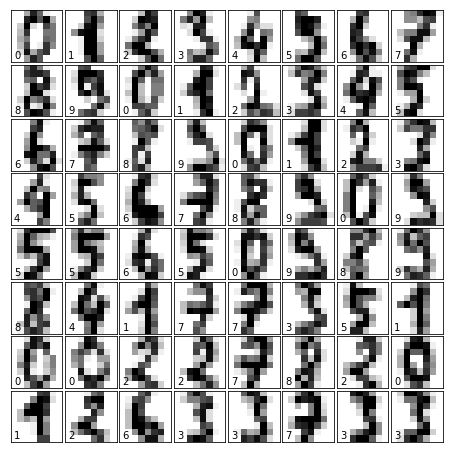

In [19]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

And create a classifier:

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

We can take a look at the classification report of this classifier:

In [22]:
from sklearn.metrics import classification_report

print(classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



And for good measure, plot the confusion matrix:

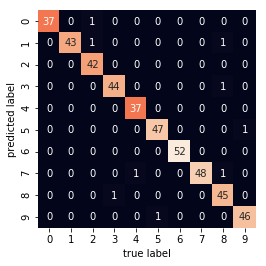

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Untuned and it knocks it out of the park. Pretty good stuff.